**задание 1. линейно разделимые датасеты**

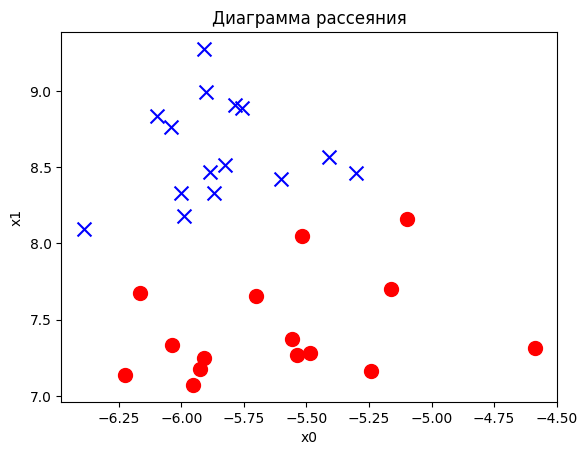

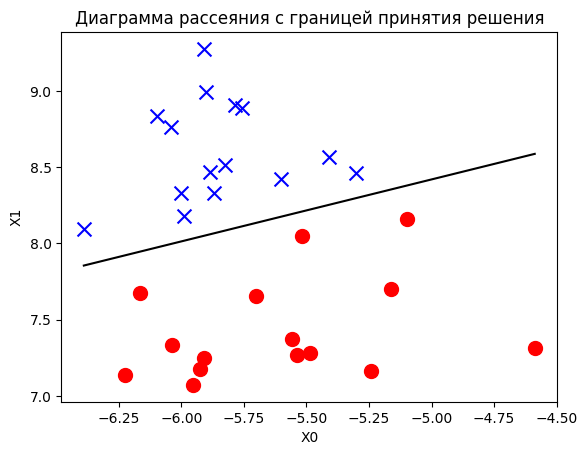

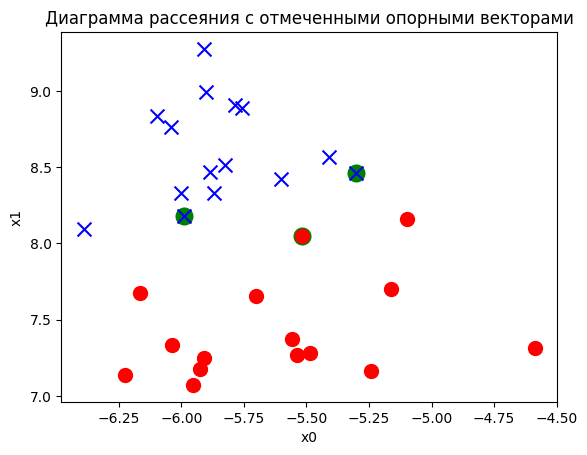

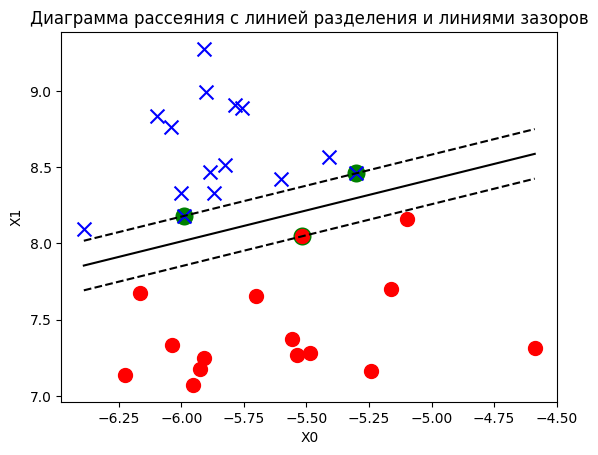

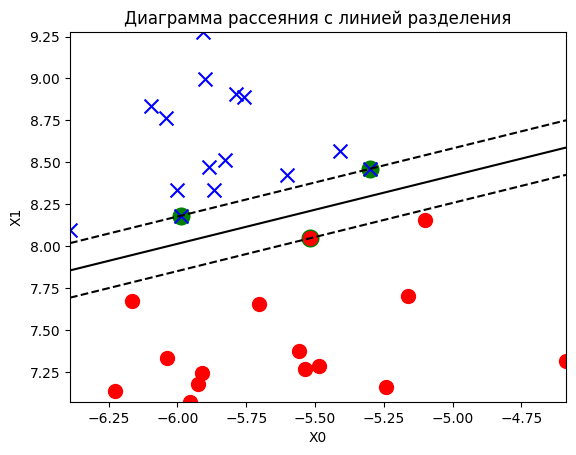

1.0
[[15  0]
 [ 0 15]]


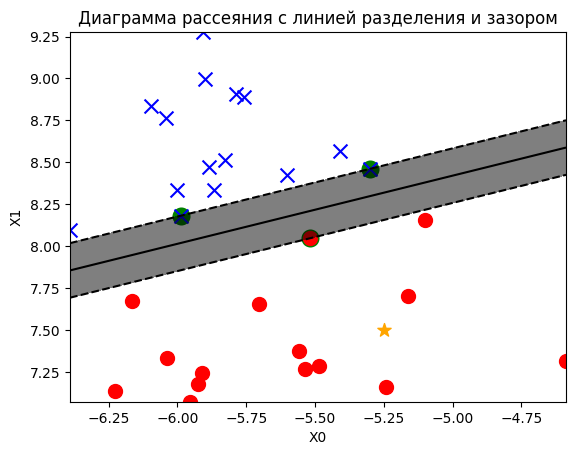

array([0])

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np

X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

svm_linear.coef_

svm_linear.intercept_

X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])

plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c границей принятия решения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

svm_linear.support_vectors_

svm_linear.support_

svm_linear.n_support_

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.plot(X0,(-svm_linear.intercept_[0]-1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')
plt.plot(X0,(-svm_linear.intercept_[0]+1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X0_grid +  svm_linear.coef_[0][1] * X1_grid
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()



y_pred =  svm_linear.predict(X)
import sklearn.metrics as metrics
print(metrics.accuracy_score(y, y_pred))

print(metrics.confusion_matrix(y, y_pred))

observation_new = [[-5.25, 7.5]]

plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

svm_linear.decision_function(observation_new)

svm_linear.predict(observation_new)

*эксперименты с параметром С.* Маленькие значения C дают более гибкую, но менее точную модель.
Большие значения C делают модель жёсткой и точной на обучающих данных, но могут привести к переобучению.

Если новая точка находится с одной стороны границы, модель классифицирует её в соответствующий класс.
Если точку переместить на другую сторону границы, предсказанный класс изменится.

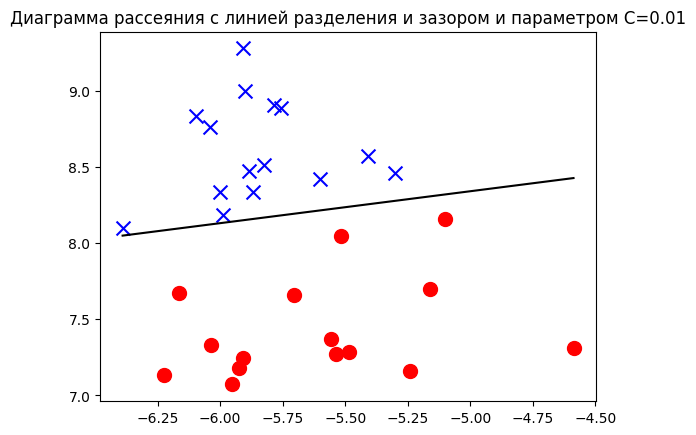

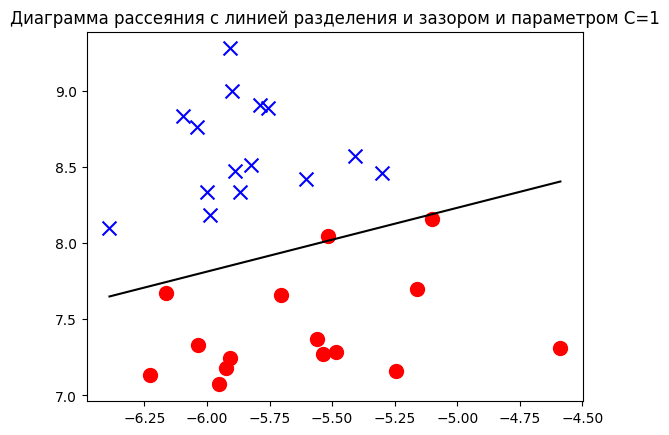

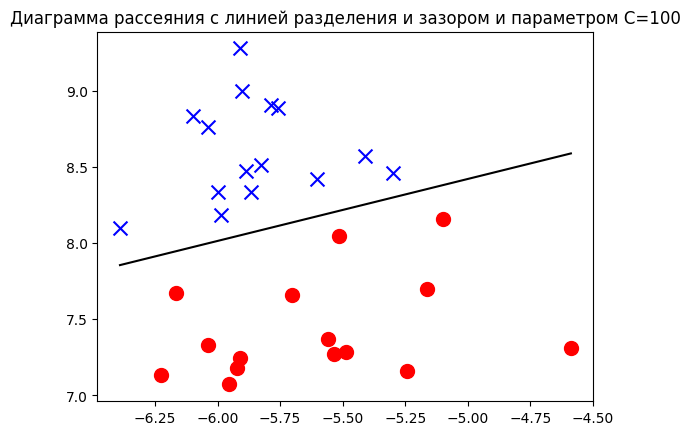

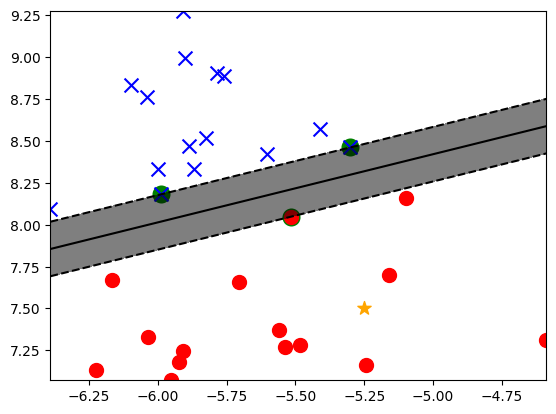

1.0
[[15  0]
 [ 0 15]]


array([0])

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
import sklearn.metrics as metrics

X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)


for C_value in [0.01, 1, 100]:
    svm_model = SVC(kernel='linear', C=C_value)
    svm_model.fit(X, y)

    X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])

    plt.title(f"Диаграмма рассеяния c линией разделения и зазором и параметром С={C_value}")
    plt.plot(X0, -svm_model.intercept_[0]/svm_model.coef_[0][1] - svm_model.coef_[0][0]/svm_model.coef_[0][1]*X0, c='k')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
    plt.show()

observation_new = [[-5.25, 7.5]]

def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], linewidth=7, facecolors='green')
    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])
    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)

    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)
    plt.show()

plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_model)

print(metrics.accuracy_score(y, svm_model.predict(X)))
print(metrics.confusion_matrix(y, svm_model.predict(X)))

svm_model.predict(observation_new)


**Линейно неразделимые данные с зазором**

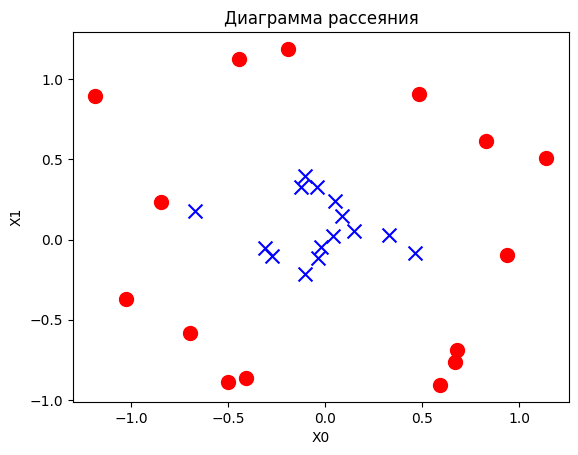

данные об опорных векторах
[6 2]
[11 20 21 23 28 29 25 27]
[[ 0.9388294  -0.09554628]
 [-0.84682371  0.23287306]
 [-0.19166925  1.18895776]
 [-0.69539045 -0.58523359]
 [ 0.68060508 -0.68615145]
 [ 0.48354792  0.91063288]
 [-0.66975235  0.17866445]
 [ 0.46427295 -0.08540628]]


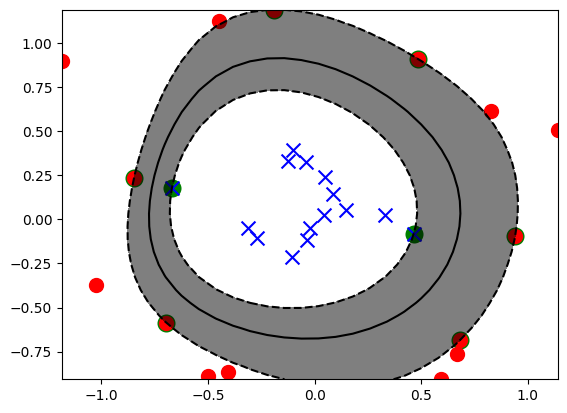

наши метрики: акураси и конфужн матрица
0.4666666666666667
[[7 8]
 [8 7]]


In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)

print('данные об опорных векторах')
print(svm_rbf.n_support_)
print(svm_rbf.support_)
print(svm_rbf.support_vectors_)

plot_decision_regions(X, y, svm_rbf)

print('наши метрики: акураси и конфужн матрица')
print(metrics.accuracy_score(y, y_pred))
print(metrics.confusion_matrix(y, y_pred))

задание 3

Ядро: linear
Accuracy: 0.66
Confusion Matrix:
[[19 31]
 [ 3 47]]



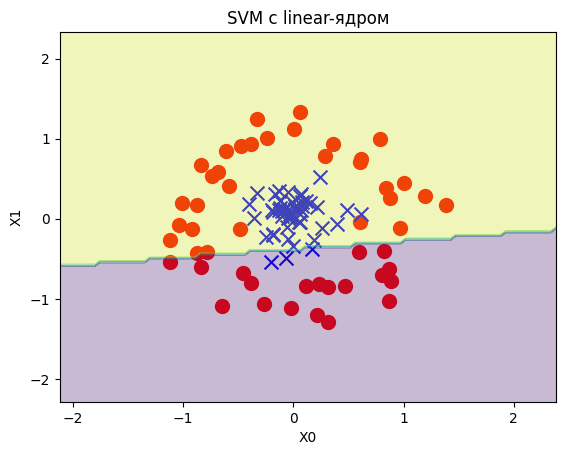

Ядро: poly
Accuracy: 0.60
Confusion Matrix:
[[10 40]
 [ 0 50]]



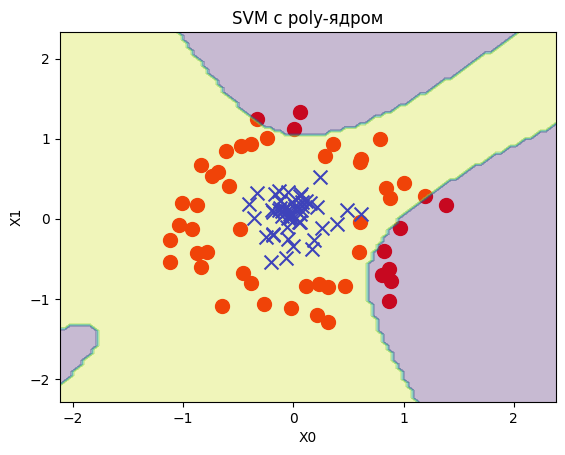

Ядро: rbf
Accuracy: 1.00
Confusion Matrix:
[[50  0]
 [ 0 50]]



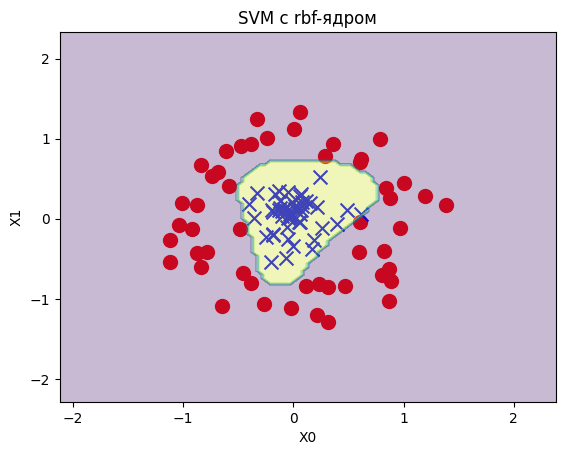

Ядро: sigmoid
Accuracy: 0.49
Confusion Matrix:
[[23 27]
 [24 26]]



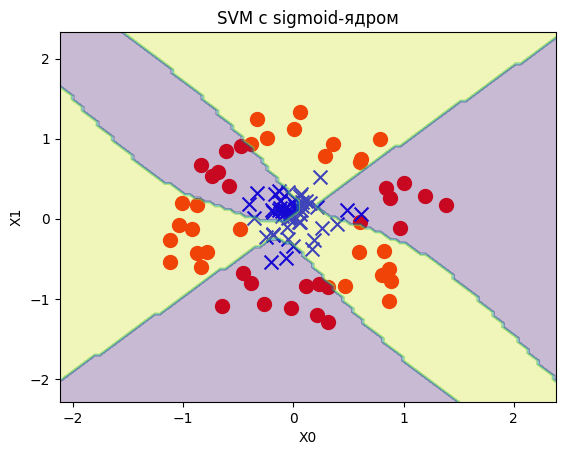

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score, confusion_matrix

def plot_decision_regions(X, y, model, title):
    plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker="x", c='b', s=100)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)

    plt.title(title)
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

X, y = make_circles(n_samples=100, random_state=5, factor=0.1, noise=0.2)

#ядра SVM
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    if kernel == 'poly':
        model = SVC(kernel=kernel, degree=3, C=100)
    else:
        model = SVC(kernel=kernel, C=100)

    model.fit(X, y)
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)

    print(f'Ядро: {kernel}')
    print(f'Accuracy: {acc:.2f}')
    print(f'Confusion Matrix:\n{cm}\n')

    plot_decision_regions(X, y, model, f'SVM с {kernel}-ядром')

**Данные без зазора**

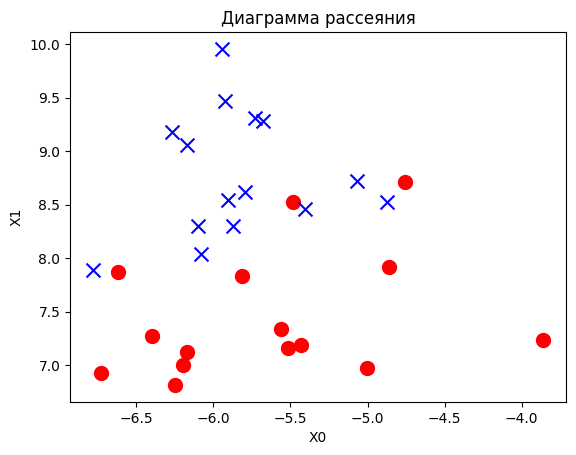

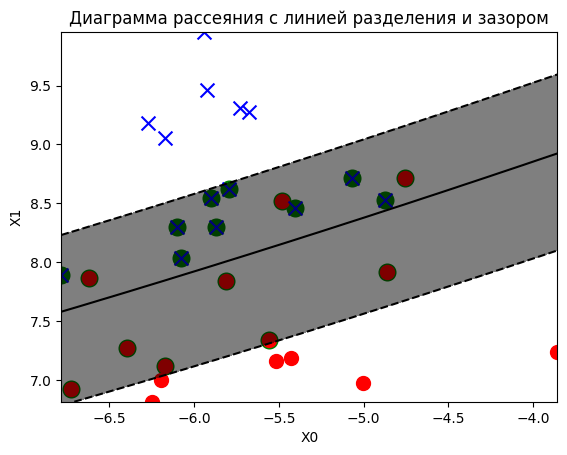

[9 9]
array([[12,  3],
[ 0, 15]])


In [ ]:
#from mlxtend.plotting import plot_decision_regions

def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

svm_poly = SVC(kernel='poly', degree=4, C=2).fit(X, y)

plot_decision_regions(X, y, svm_poly)

print(svm_poly.n_support_)

print(metrics.accuracy_score(y, y_pred))
print(metrics.confusion_matrix(y, y_pred))

задание 4-5

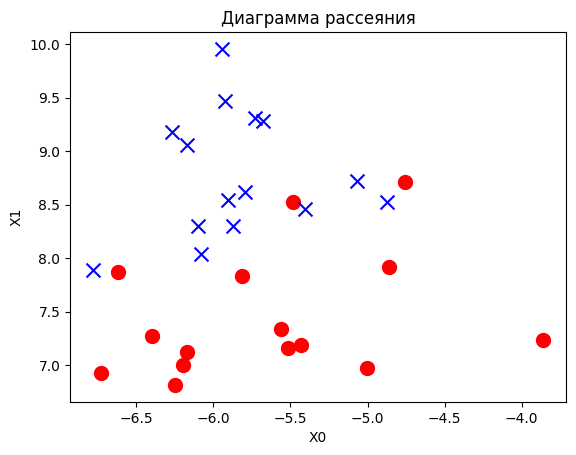

Полиномиальное ядро, C=0.1


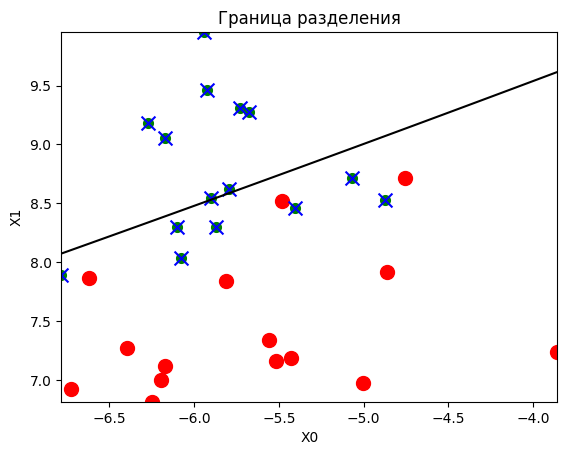

Опорные векторы: [15 15]
Полиномиальное ядро, C=1


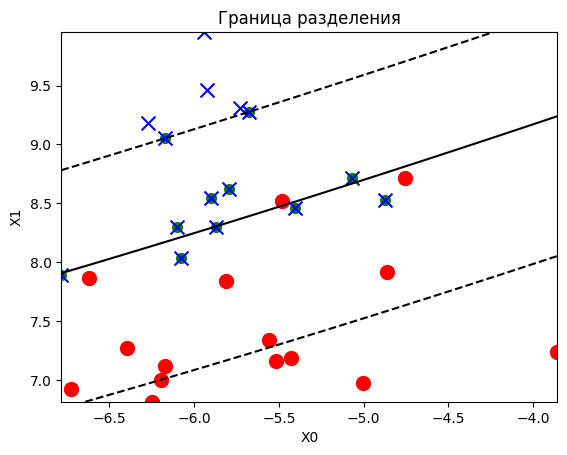

Опорные векторы: [10 11]
Полиномиальное ядро, C=10


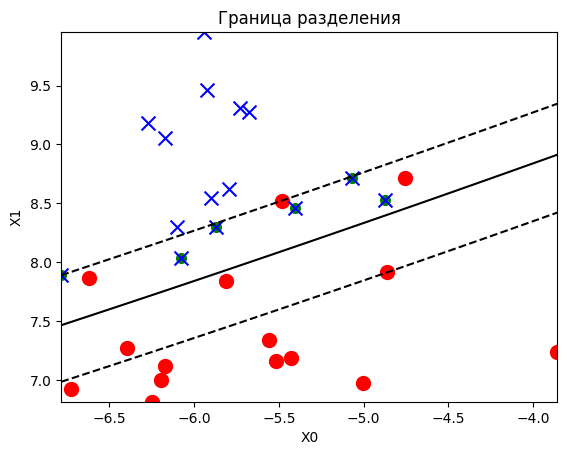

Опорные векторы: [6 6]
SVM с линейным ядром


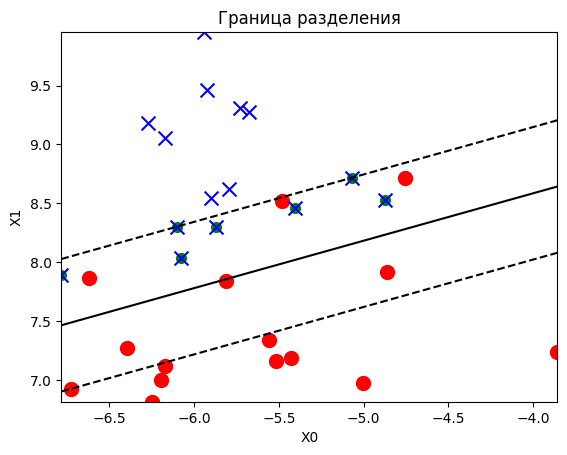

Опорные векторы: [7 7]
LinearSVC


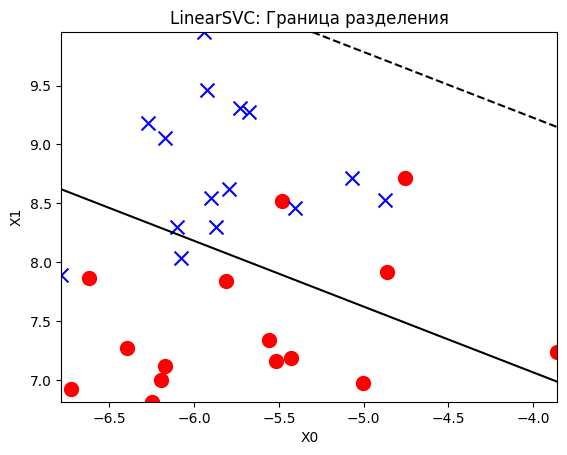

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix

def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], linewidth=2, facecolors='green')
    plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker="x", c='b', s=100)
    X0, X1 = np.meshgrid(
        np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
        np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    )
    Z = model.decision_function(np.c_[X0.ravel(), X1.ravel()]).reshape(X0.shape)
    plt.contour(X0, X1, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.title("Граница разделения")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker="x", c='b', s=100)
plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

for C in [0.1, 1, 10]:
    print(f"Полиномиальное ядро, C={C}")
    svm_poly = SVC(kernel='poly', degree=4, C=C).fit(X, y)
    plot_decision_regions(X, y, svm_poly)
    print("Опорные векторы:", svm_poly.n_support_)

#линейный SVM через SVC
print("SVM с линейным ядром")
svm_linear = SVC(kernel='linear', C=1).fit(X, y)
plot_decision_regions(X, y, svm_linear)
print("Опорные векторы:", svm_linear.n_support_)

print("LinearSVC")
lin_svc = LinearSVC(C=1, max_iter=10000).fit(X, y)
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker="x", c='b', s=100)
X0, X1 = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
)
Z = lin_svc.decision_function(np.c_[X0.ravel(), X1.ravel()]).reshape(X0.shape)
plt.contour(X0, X1, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.title("LinearSVC: Граница разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

задание 6

In [ ]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

X, y = make_classification(n_samples=1000, n_features=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kernels = ['linear', 'rbf', 'poly']
C_values = [0.1, 1, 10]
best_score = 0
best_params = {}

for kernel in kernels:
    for C in C_values:
        model = SVC(kernel=kernel, C=C, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)

        if score > best_score:
            best_score = score
            best_params = {'kernel': kernel, 'C': C}

        print(f'Kernel: {kernel}, C: {C}, Accuracy: {score:.4f}')

print(f'Лучшие параметры: {best_params}, Точность: {best_score:.4f}')


Kernel: linear, C: 0.1, Accuracy: 0.8850
Kernel: linear, C: 1, Accuracy: 0.8850
Kernel: linear, C: 10, Accuracy: 0.8850
Kernel: rbf, C: 0.1, Accuracy: 0.8650
Kernel: rbf, C: 1, Accuracy: 0.8800
Kernel: rbf, C: 10, Accuracy: 0.8850
Kernel: poly, C: 0.1, Accuracy: 0.8300
Kernel: poly, C: 1, Accuracy: 0.8700
Kernel: poly, C: 10, Accuracy: 0.8750
Лучшие параметры: {'kernel': 'linear', 'C': 0.1}, Точность: 0.8850


задание 7

In [ ]:
import time
import numpy as np
from sklearn.datasets import make_classification
from sklearn.svm import SVC

samples_list = [10000, 50000] #больше нельзя, код валится

kernel = 'rbf'
C = 1

for n_samples in samples_list:
    X, y = make_classification(n_samples=n_samples, n_features=5, random_state=42)

    model = SVC(kernel=kernel, C=C)

    start_time = time.perf_counter()
    model.fit(X, y)
    end_time = time.perf_counter()

    print(f"Обучение SVM на {n_samples} точках заняло {end_time - start_time:.2f} секунд.")

Обучение SVM на 10000 точках заняло 1.90 секунд.
Обучение SVM на 50000 точках заняло 15.02 секунд.


задание 8

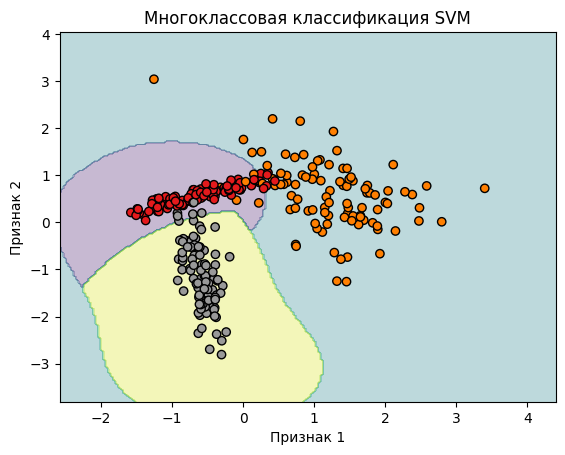

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=300, n_features=2, n_classes=3, n_clusters_per_class=1, n_redundant=0, random_state=42)

scaler = StandardScaler()
X = scaler.fit_transform(X)

svm_model = SVC(kernel='rbf', decision_function_shape='ovo').fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=plt.cm.Set1)
plt.title("Многоклассовая классификация SVM")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()


задание 9

Accuracy: 81.48%


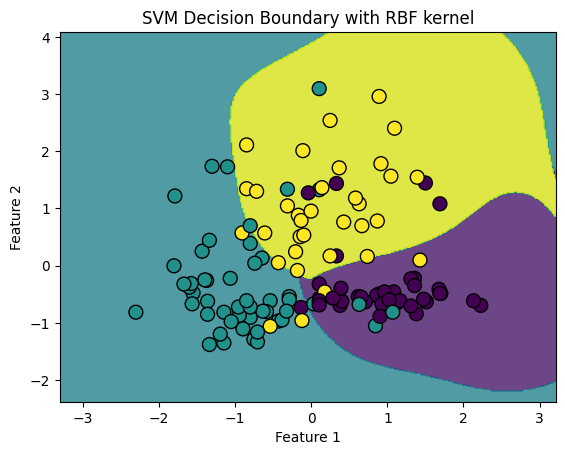

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
\
wine = datasets.load_wine()
X = wine.data[:, :2]
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVC(kernel='rbf', C=1)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

h = .02  # шаг для сетки
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=100)
plt.title('SVM Decision Boundary with RBF kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


задание 10

Mean Squared Error: 0.23


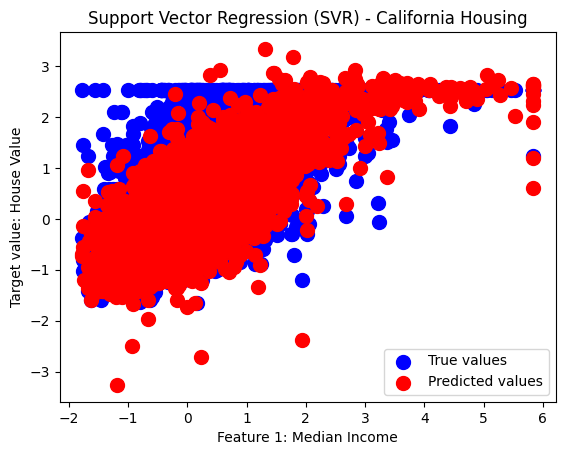

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

california = datasets.fetch_california_housing()
X = california.data
y = california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

plt.scatter(X_test[:, 0], y_test, color='blue', label='True values', s=100)
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted values', s=100)
plt.title('Support Vector Regression (SVR) - California Housing')
plt.xlabel('Feature 1: Median Income')
plt.ylabel('Target value: House Value')
plt.legend()
plt.show()
